In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Alzheimer

In [2]:
alz_metrics = pd.read_excel('summary_results.xlsx', sheet_name='alzheimer best metrics')
alz_metrics['batch_entropy mean'] = np.log(21) - alz_metrics['batch_entropy mean']
alz_metrics['qc_aPCC mean'] = 1 - alz_metrics['qc_aPCC mean']


In [3]:
alz_metrics

,model name,batch_entropy mean,batch_entropy std,adjusted_rand_score mean,adjusted_rand_score std,adjusted_mutual_info_score mean,adjusted_mutual_info_score std,qc_dist/total_dist mean,qc_dist/total_dist std,qc_aPCC mean,qc_aPCC std
0,raw,1.070765,0.000000,0.042420,0.000000,0.134557,0.000000,1.049893,0.000000,0.346903,0.000000
1,minmax,1.092116,0.000000,0.035962,0.000000,0.168424,0.000000,0.955373,0.000000,0.445971,0.000000
2,minmax_per_batch,1.044917,0.000000,0.108159,0.000000,0.240812,0.000000,3.261474,0.000000,0.828587,0.000000
3,standard,1.076401,0.000000,0.025110,0.000000,0.114335,0.000000,0.822470,0.000000,0.671371,0.000000
4,standard_per_batch,0.801895,0.000000,0.007280,0.000000,0.031370,0.000000,3.582448,0.000000,0.774485,0.000000
5,robust,1.098318,0.000000,0.045668,0.000000,0.154156,0.000000,1.137376,0.000000,0.804810,0.000000
6,robust_per_batch,0.848066,0.000000,-0.000805,0.000000,0.010397,0.000000,1.747916,0.000000,0.803554,0.000000
7,combat,0.707500,0.000000,0.001292,0.000000,0.000951,0.000000,0.958292,0.000000,1.018158,0.000000
8,pycombat,0.970650,0.000000,0.010479,0.000000,0.025512,0.000000,0.871237,0.000000,0.227837,0.000000
9,harmony,0.687256,0.000000,-0.005456,0.000000,-0.014437,0.000000,0.765994,0.000000,0.965680,0.000000


In [4]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['batch_entropy mean'], alz_metrics['adjusted_rand_score mean'], alz_metrics['adjusted_mutual_info_score mean'], alz_metrics['qc_dist/total_dist mean'], alz_metrics['qc_aPCC mean'])),
    "sd": pd.concat((alz_metrics['batch_entropy std'], alz_metrics['adjusted_rand_score std'], alz_metrics['adjusted_mutual_info_score std'], alz_metrics['qc_dist/total_dist std'], alz_metrics['qc_aPCC std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['ME-BE' for _ in range(len(alz_metrics['model name']))] + ['ARI' for _ in range(len(alz_metrics['model name']))] + ['AMI' for _ in range(len(alz_metrics['model name']))] + ['nMED' for _ in range(len(alz_metrics['model name']))] + ['1 - QC aPCC' for _ in range(len(alz_metrics['model name']))]
})
df_be_ami_ari = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['batch_entropy mean'], alz_metrics['adjusted_rand_score mean'], alz_metrics['adjusted_mutual_info_score mean'])),
    "sd": pd.concat((alz_metrics['batch_entropy std'], alz_metrics['adjusted_rand_score std'], alz_metrics['adjusted_mutual_info_score std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['ME-BE' for _ in range(len(alz_metrics['model name']))] + ['ARI' for _ in range(len(alz_metrics['model name']))] + ['AMI' for _ in range(len(alz_metrics['model name']))]
})
df_dist_apcc = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['qc_dist/total_dist mean'], alz_metrics['qc_aPCC mean'])),
    "sd": pd.concat((alz_metrics['qc_dist/total_dist std'], alz_metrics['qc_aPCC std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['nMED' for _ in range(len(alz_metrics['model name']))] + ['1 - QC aPCC' for _ in range(len(alz_metrics['model name']))]
})
df_be = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['batch_entropy mean'],
    "sd" : alz_metrics['batch_entropy std'],
    "models": alz_metrics['model name'],
    "metrics": ['ME-BE' for _ in range(len(alz_metrics['model name']))]
})
df_ari = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['adjusted_rand_score mean'],
    "sd" : alz_metrics['adjusted_rand_score std'],
    "models": alz_metrics['model name'],
    "metrics": ['ARI' for _ in range(len(alz_metrics['model name']))]
})
df_ami = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['adjusted_mutual_info_score mean'],
    "sd" : alz_metrics['adjusted_mutual_info_score std'],
    "models": alz_metrics['model name'],
    "metrics": ['AMI' for _ in range(len(alz_metrics['model name']))]
})
df_dist = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['qc_dist/total_dist mean'],
    "sd" : alz_metrics['qc_dist/total_dist std'],
    "models": alz_metrics['model name'],
    "metrics": ['nMED' for _ in range(len(alz_metrics['model name']))]
})
df_qc_aPCC = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['qc_aPCC mean'],
    "sd" : alz_metrics['qc_aPCC std'],
    "models": alz_metrics['model name'],
    "metrics": ['1 - QC aPCC' for _ in range(len(alz_metrics['model name']))]
})
lolims = [True for _ in range(len(df_be['metrics']))]

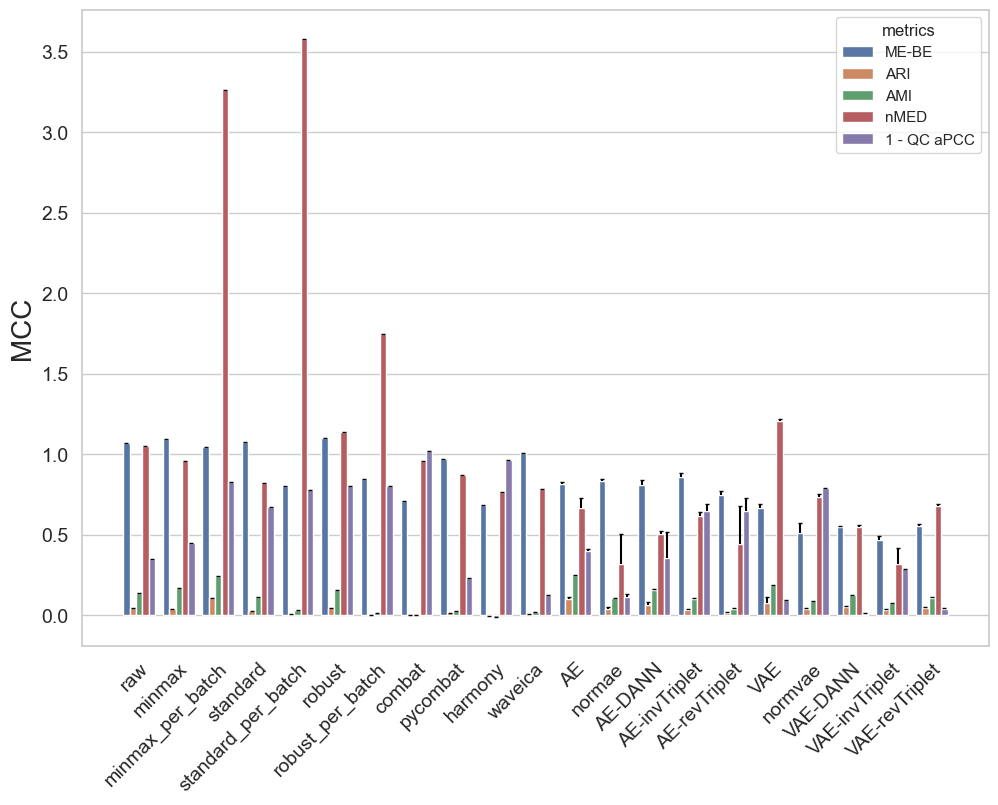

In [5]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])
plotline, caplines, barlinecols = g.errorbar(x = ind-2*width, y = df_be['average'], lolims=lolims,
            yerr=df_be['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(3)
    
plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_ari['average'], lolims=lolims,
            yerr=df_ari['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(3)
    
plotline, caplines, barlinecols = g.errorbar(x = ind, y = df_ami['average'], lolims=lolims,
            yerr=df_ami['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(3)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_dist['average'], lolims=lolims,
            yerr=df_dist['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(3)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+2*width, y = df_qc_aPCC['average'], lolims=lolims,
            yerr=df_qc_aPCC['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(3)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("MCC",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=14)
    
plt.show()

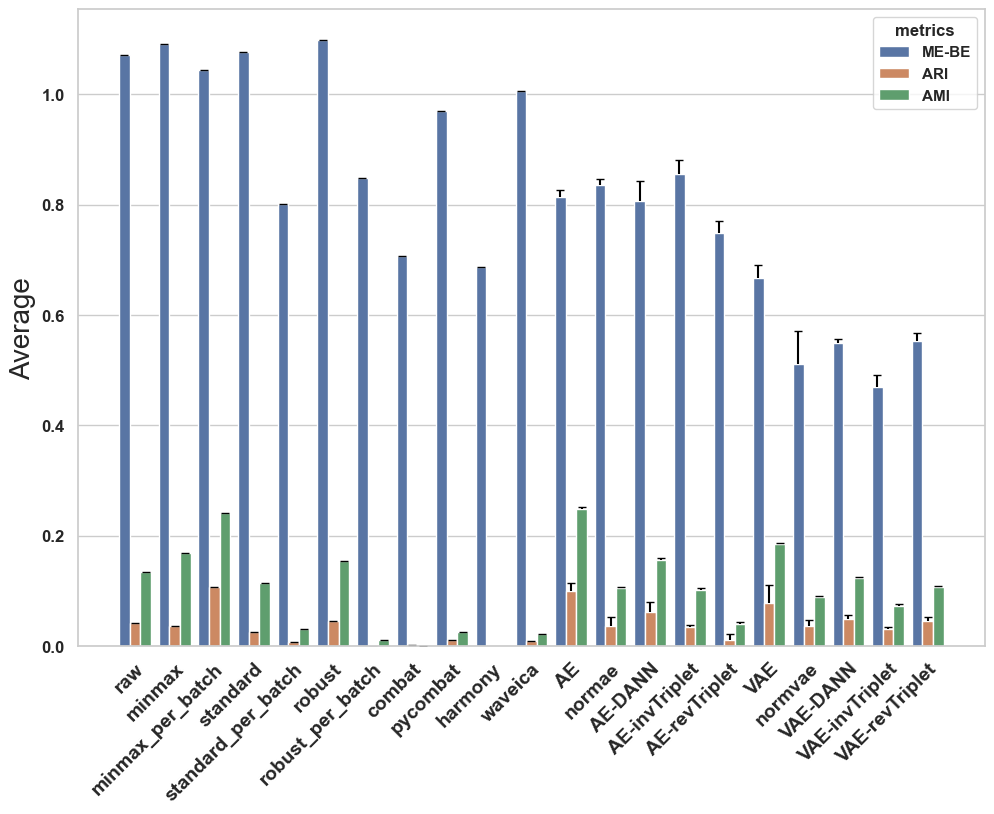

In [6]:
N = len(alz_metrics['model name'])
width = 0.27
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df_be_ami_ari, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])
plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_be['average'], lolims=lolims,
            yerr=df_be['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(6)
    
plotline, caplines, barlinecols = g.errorbar(x = ind, y = df_ari['average'], lolims=lolims,
            yerr=df_ari['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(6)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_ami['average'], lolims=lolims,
            yerr=df_ami['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(6)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("Average",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=12)
g.set(ylim=(0, None))    
plt.show()

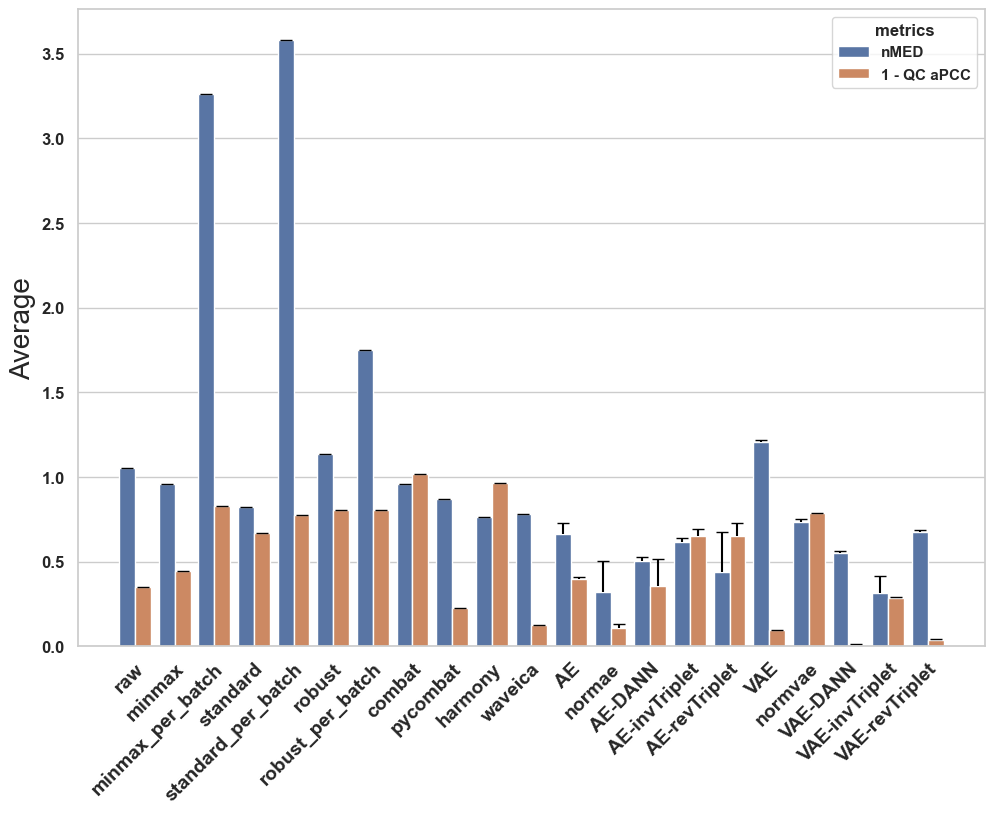

In [7]:
N = len(alz_metrics['model name'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df_dist_apcc, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])
    
plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_dist['average'], lolims=lolims,
            yerr=df_dist['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(8)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_qc_aPCC['average'], lolims=lolims,
            yerr=df_qc_aPCC['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(8)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("Average",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=12)
g.set(ylim=(0, None))    
    
plt.show()

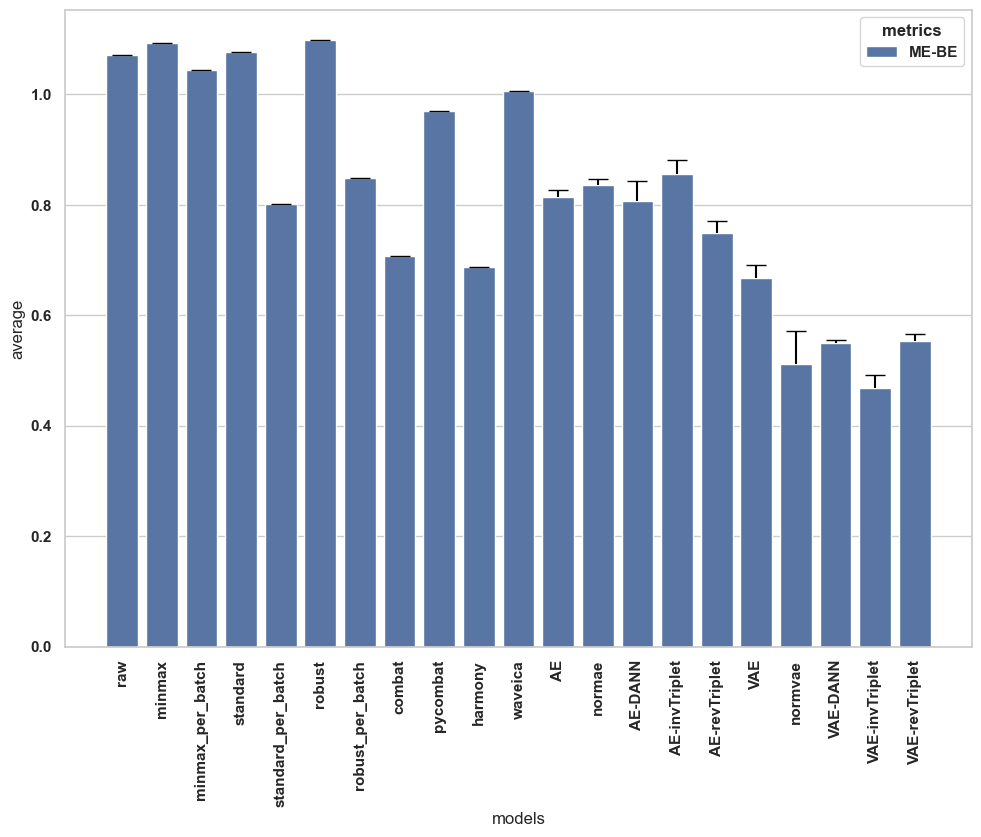

In [8]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df_be, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])

plotline, caplines, barlinecols = g.errorbar(x = ind, y = df_be['average'], lolims=lolims,
            yerr=df_be['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(15)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
 
plt.show()

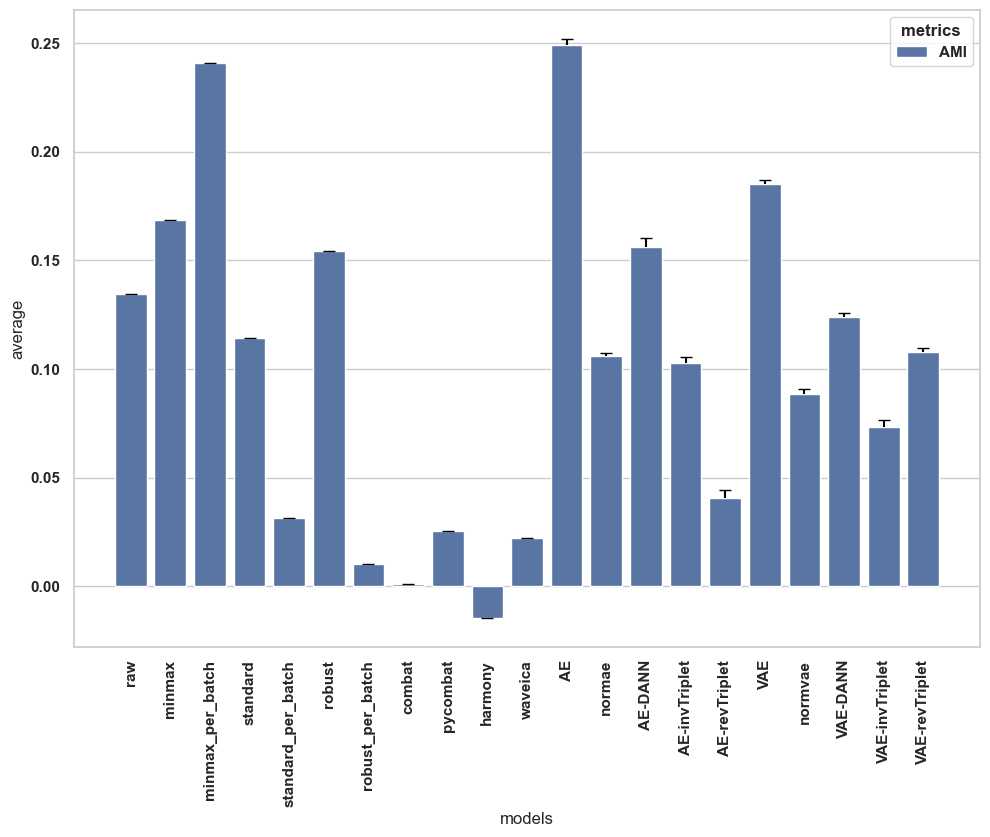

In [9]:
N = len(alz_metrics['model name'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df_ami, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])

plotline, caplines, barlinecols = g.errorbar(x = ind, y = df_ami['average'], lolims=lolims,
            yerr=df_ami['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(8)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
 
plt.show()

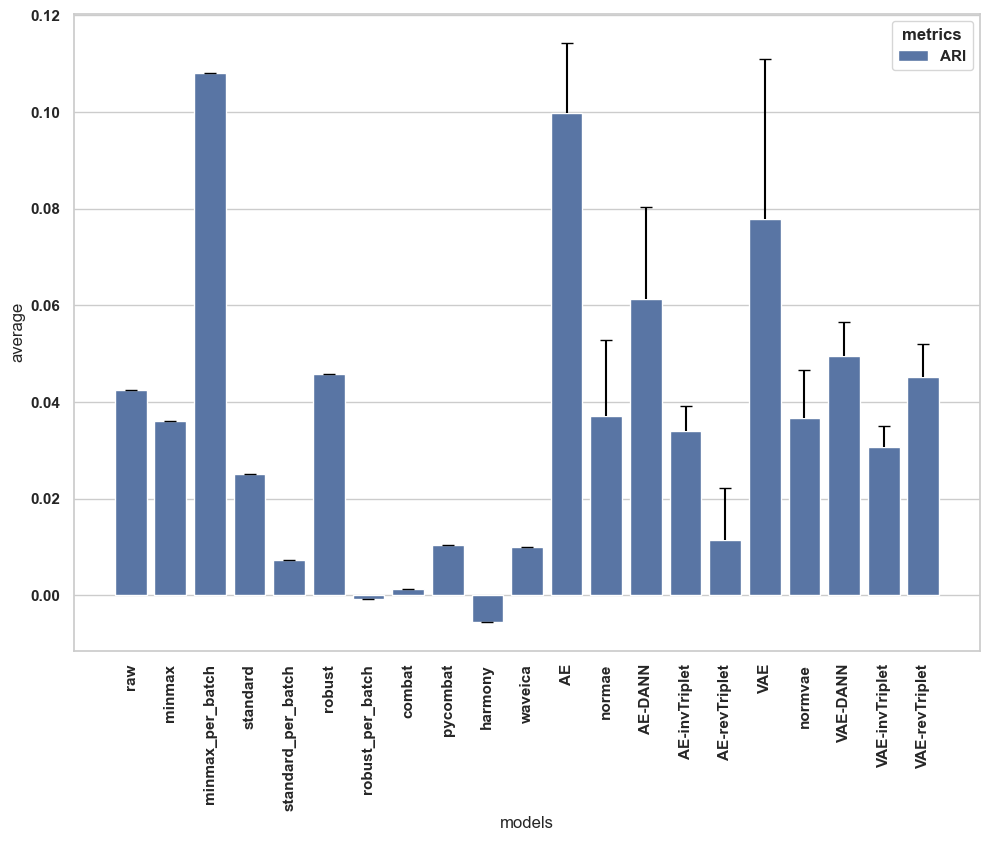

In [10]:
N = len(alz_metrics['model name'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df_ari, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])

plotline, caplines, barlinecols = g.errorbar(x = ind, y = df_ari['average'], lolims=lolims,
            yerr=df_ari['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(8)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
 
plt.show()

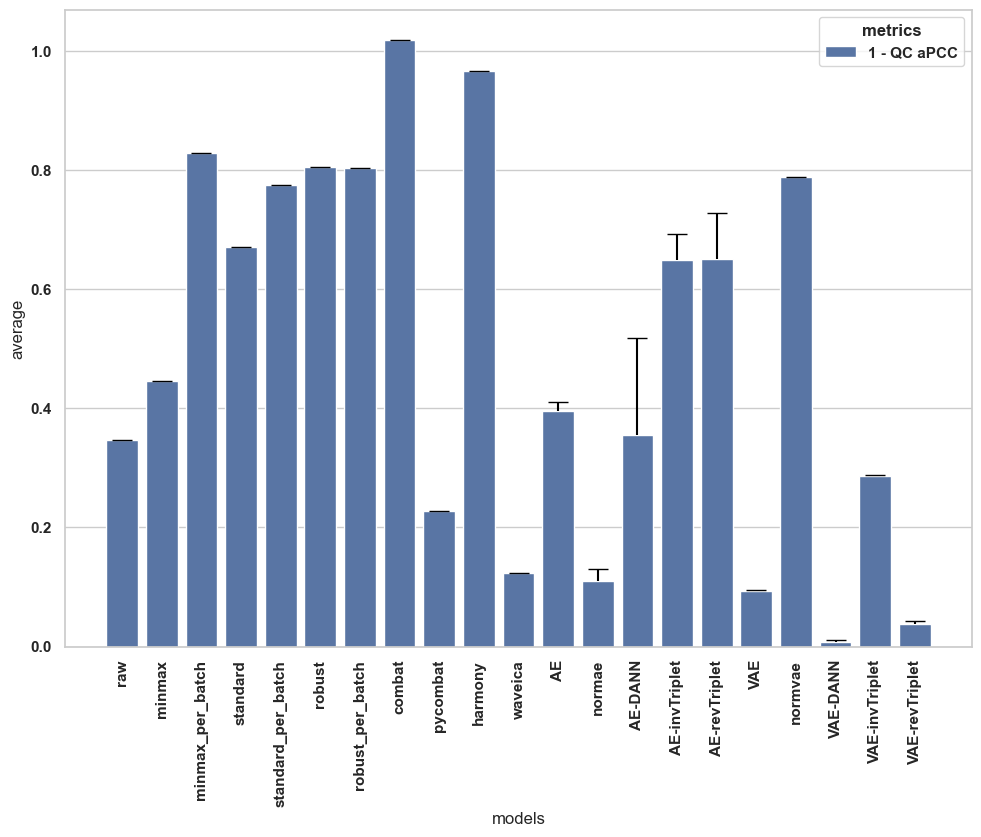

In [11]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df_qc_aPCC, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])

    
plotline, caplines, barlinecols = g.errorbar(x = ind, y = df_qc_aPCC['average'], lolims=lolims,
            yerr=df_qc_aPCC['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(15)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
 
plt.show()

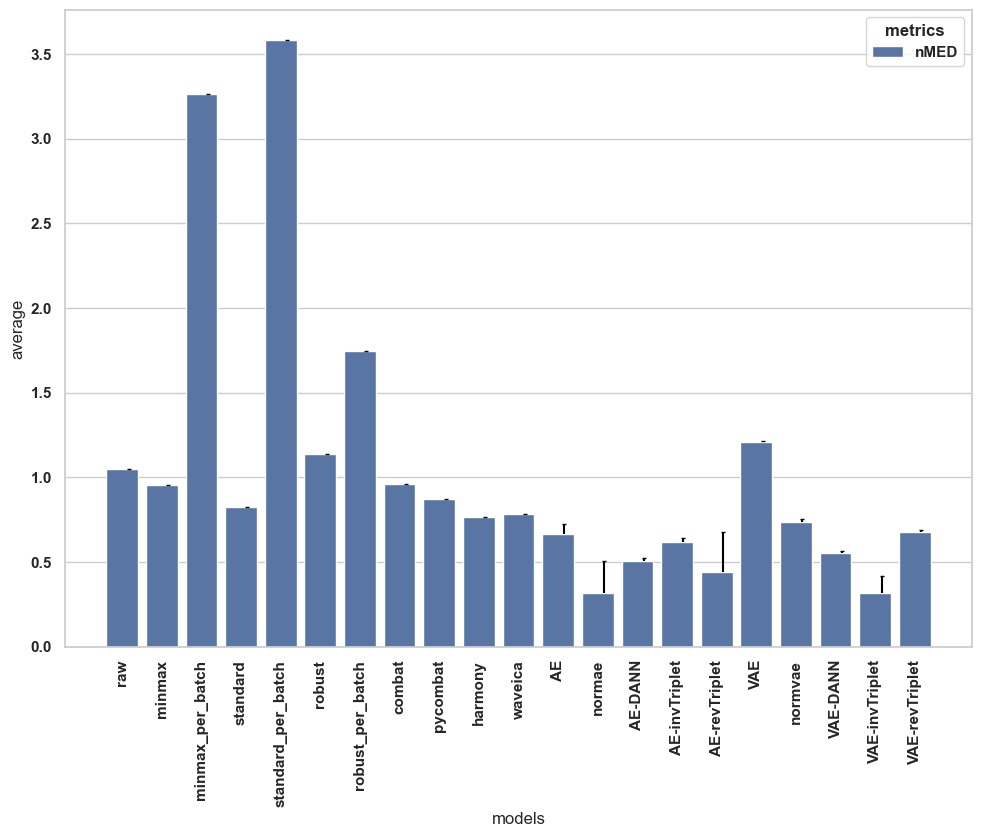

In [12]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df_dist, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])
   
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_dist['average'], lolims=lolims,
            yerr=df_dist['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(3)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
 
plt.show()

# Amide

In [13]:
alz_metrics = pd.read_excel('summary_results.xlsx', sheet_name='amide best metrics')
alz_metrics['batch_entropy mean'] = np.log(3) - alz_metrics['batch_entropy mean']
alz_metrics['qc_aPCC mean'] = 1 - alz_metrics['qc_aPCC mean']


In [14]:
alz_metrics

,model name,batch_entropy mean,batch_entropy std,adjusted_rand_score mean,adjusted_rand_score std,adjusted_mutual_info_score mean,adjusted_mutual_info_score std,qc_dist/total_dist mean,qc_dist/total_dist std,qc_aPCC mean,qc_aPCC std,Unnamed: 11,Unnamed: 12,adjusted_mutual_info_score mean.1,qc_dist/total_dist mean.1,batch_entropy mean.1,valid/mcc_mean
0,raw,1.098612,0.000000,1.000000,0.000000,1.000000,0.000000,0.838954,0.000000,0.184585,0.000000,NaN,NaN,1.000000,0.838954,0.000000,0.920000
1,minmax,1.098612,0.000000,1.000000,0.000000,1.000000,0.000000,0.902304,0.000000,0.519836,0.000000,NaN,NaN,1.000000,0.902304,0.000000,0.940000
2,minmax_per_batch,1.098263,0.000000,1.000000,0.000000,1.000000,0.000000,0.967037,0.000000,0.674074,0.000000,NaN,NaN,1.000000,0.967037,0.000349,0.930000
3,standard,1.098612,0.000000,1.000000,0.000000,1.000000,0.000000,0.913505,0.000000,0.817210,0.000000,NaN,NaN,1.000000,0.913505,0.000000,0.920000
4,standard_per_batch,0.693649,0.000000,0.942709,0.000000,0.913184,0.000000,0.961342,0.000000,0.760304,0.000000,NaN,NaN,0.913184,0.961342,0.404963,0.920000
5,robust,1.087166,0.000000,1.000000,0.000000,1.000000,0.000000,0.881791,0.000000,0.689737,0.000000,NaN,NaN,1.000000,0.881791,0.011446,0.890000
6,robust_per_batch,0.557261,0.000000,0.737838,0.000000,0.703037,0.000000,1.035938,0.000000,0.639029,0.000000,NaN,NaN,0.703037,1.035938,0.541351,0.830000
7,combat,0.207062,0.000000,0.002520,0.000000,0.004428,0.000000,1.181689,0.000000,0.991345,0.000000,NaN,NaN,0.004428,1.181689,0.891550,0.050000
8,pycombat,0.777353,0.000000,0.075338,0.000000,0.266585,0.000000,0.793879,0.000000,0.056920,0.000000,NaN,NaN,0.266585,0.793879,0.321259,0.920000
9,harmony,0.522894,0.000000,0.994752,0.000000,0.989972,0.000000,0.995316,0.000000,0.821382,0.000000,NaN,NaN,0.989972,0.995316,0.575718,0.130000


In [15]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['batch_entropy mean'], alz_metrics['adjusted_rand_score mean'], alz_metrics['adjusted_mutual_info_score mean'], alz_metrics['qc_dist/total_dist mean'], alz_metrics['qc_aPCC mean'])),
    "sd": pd.concat((alz_metrics['batch_entropy std'], alz_metrics['adjusted_rand_score std'], alz_metrics['adjusted_mutual_info_score std'], alz_metrics['qc_dist/total_dist std'], alz_metrics['qc_aPCC std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['ME-BE' for _ in range(len(alz_metrics['model name']))] + ['ARI' for _ in range(len(alz_metrics['model name']))] + ['AMI' for _ in range(len(alz_metrics['model name']))] + ['nMED' for _ in range(len(alz_metrics['model name']))] + ['1 - QC aPCC' for _ in range(len(alz_metrics['model name']))]
})
df_be_ami_ari = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['batch_entropy mean'], alz_metrics['adjusted_rand_score mean'], alz_metrics['adjusted_mutual_info_score mean'])),
    "sd": pd.concat((alz_metrics['batch_entropy std'], alz_metrics['adjusted_rand_score std'], alz_metrics['adjusted_mutual_info_score std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['ME-BE' for _ in range(len(alz_metrics['model name']))] + ['ARI' for _ in range(len(alz_metrics['model name']))] + ['AMI' for _ in range(len(alz_metrics['model name']))]
})
df_dist_apcc = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['qc_dist/total_dist mean'], alz_metrics['qc_aPCC mean'])),
    "sd": pd.concat((alz_metrics['qc_dist/total_dist std'], alz_metrics['qc_aPCC std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['nMED' for _ in range(len(alz_metrics['model name']))] + ['1 - QC aPCC' for _ in range(len(alz_metrics['model name']))]
})
df_be = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['batch_entropy mean'],
    "sd" : alz_metrics['batch_entropy std'],
    "models": alz_metrics['model name'],
    "metrics": ['ME-BE' for _ in range(len(alz_metrics['model name']))]
})
df_ari = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['adjusted_rand_score mean'],
    "sd" : alz_metrics['adjusted_rand_score std'],
    "models": alz_metrics['model name'],
    "metrics": ['ARI' for _ in range(len(alz_metrics['model name']))]
})
df_ami = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['adjusted_mutual_info_score mean'],
    "sd" : alz_metrics['adjusted_mutual_info_score std'],
    "models": alz_metrics['model name'],
    "metrics": ['AMI' for _ in range(len(alz_metrics['model name']))]
})
df_dist = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['qc_dist/total_dist mean'],
    "sd" : alz_metrics['qc_dist/total_dist std'],
    "models": alz_metrics['model name'],
    "metrics": ['nMED' for _ in range(len(alz_metrics['model name']))]
})
df_qc_aPCC = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['qc_aPCC mean'],
    "sd" : alz_metrics['qc_aPCC std'],
    "models": alz_metrics['model name'],
    "metrics": ['1 - QC aPCC' for _ in range(len(alz_metrics['model name']))]
})
lolims = [True for _ in range(len(df_be['metrics']))]

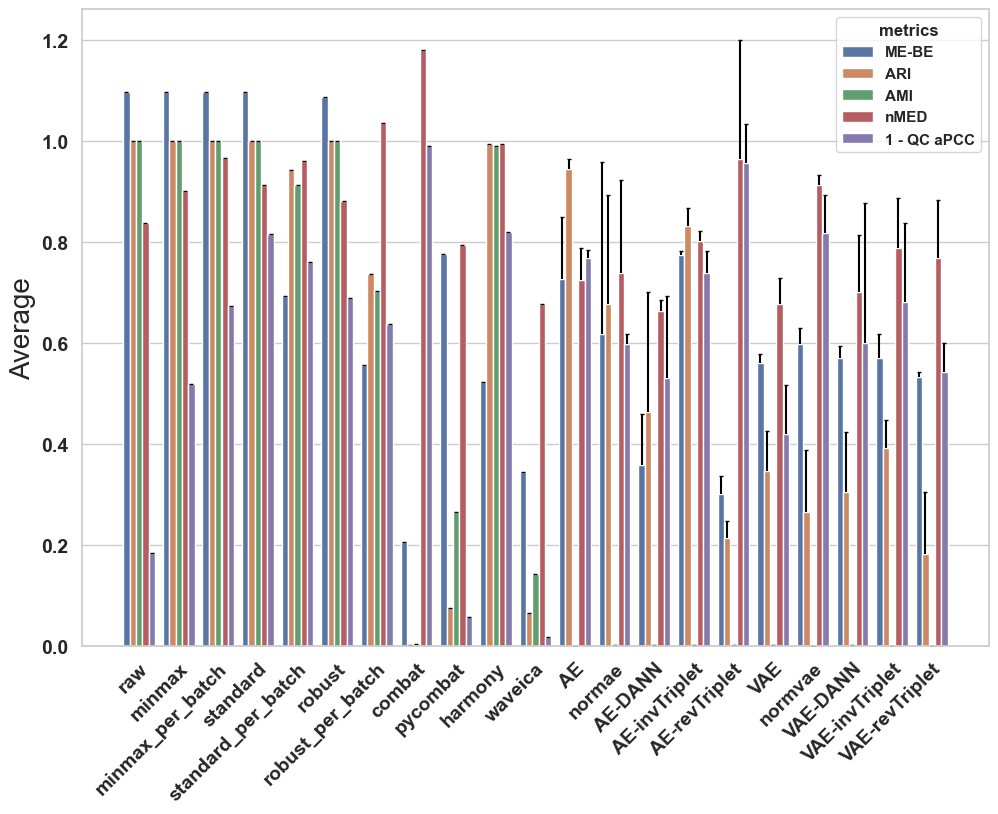

In [16]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])

plotline, caplines, barlinecols = g.errorbar(x = ind-2*width, y = df_be['average'], lolims=lolims,
            yerr=df_be['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(3)
    
plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_ari['average'], lolims=lolims,
            yerr=df_ari['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(3)
    
plotline, caplines, barlinecols = g.errorbar(x = ind, y = df_ami['average'], lolims=lolims,
            yerr=df_ami['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(3)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_dist['average'], lolims=lolims,
            yerr=df_dist['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(3)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+2*width, y = df_qc_aPCC['average'], lolims=lolims,
            yerr=df_qc_aPCC['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(3)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("Average",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=14)
 
plt.show()

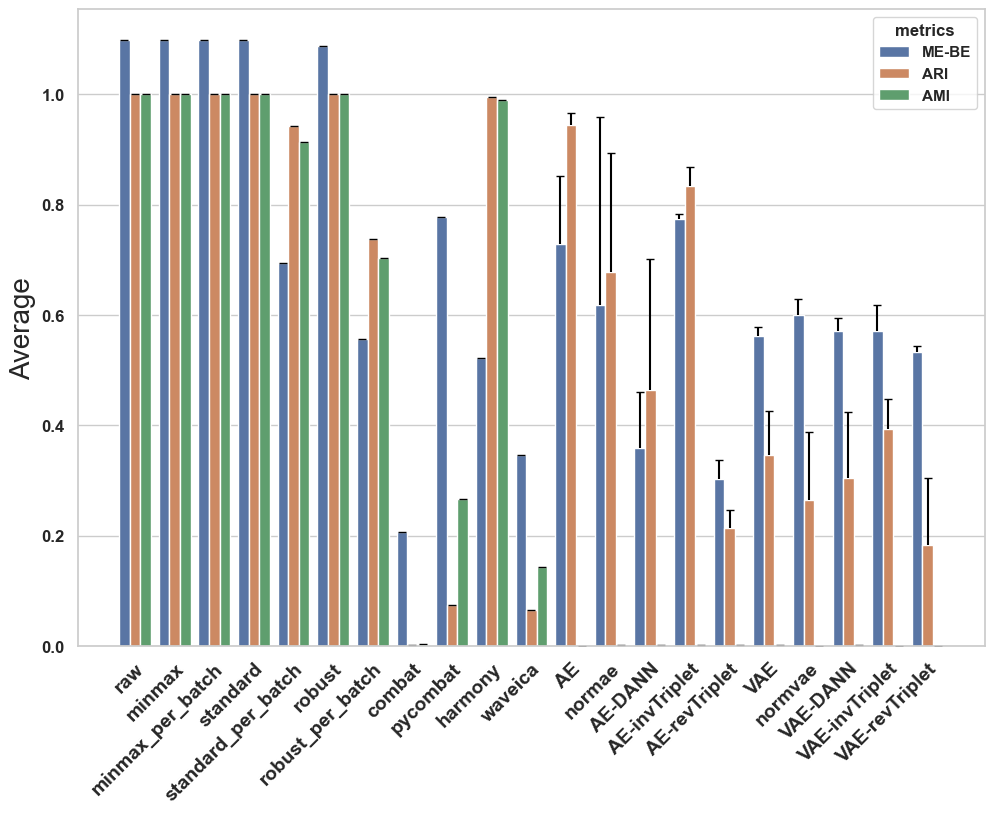

In [17]:
N = len(alz_metrics['model name'])
width = 0.27
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df_be_ami_ari, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])
plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_be['average'], lolims=lolims,
            yerr=df_be['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(6)
    
plotline, caplines, barlinecols = g.errorbar(x = ind, y = df_ari['average'], lolims=lolims,
            yerr=df_ari['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(6)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_ami['average'], lolims=lolims,
            yerr=df_ami['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(6)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("Average",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=12)
g.set(ylim=(0, None))    
    
plt.show()

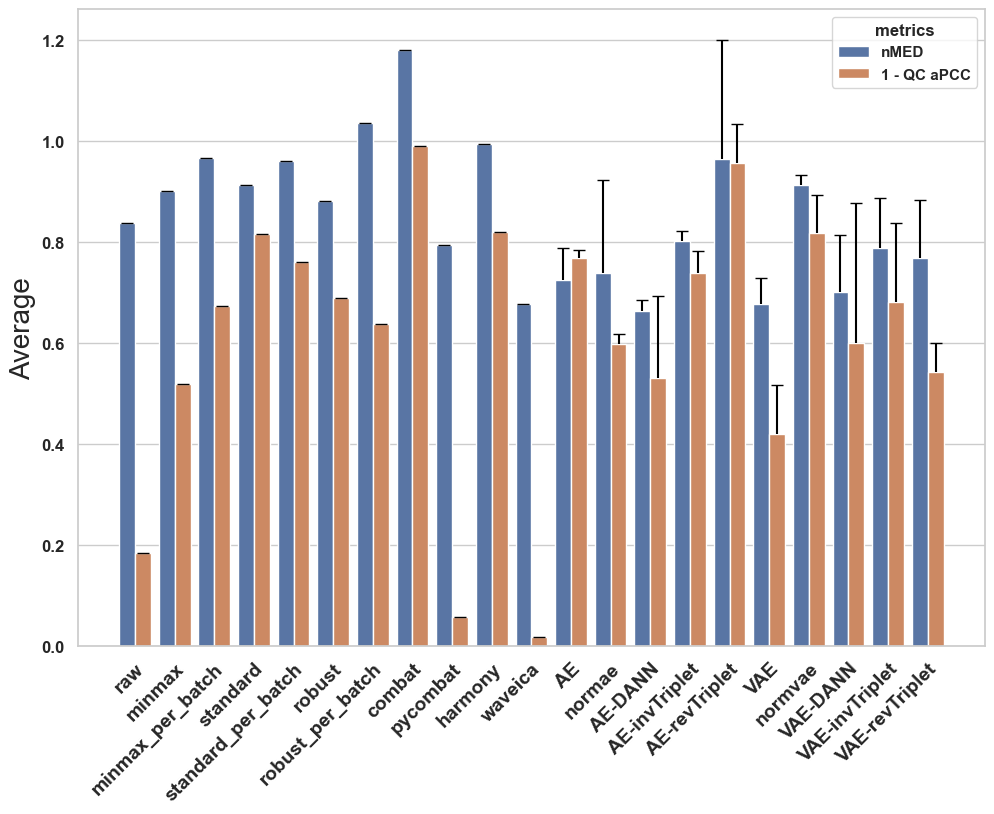

In [18]:
N = len(alz_metrics['model name'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df_dist_apcc, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])
    
plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_dist['average'], lolims=lolims,
            yerr=df_dist['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(8)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_qc_aPCC['average'], lolims=lolims,
            yerr=df_qc_aPCC['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(8)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("Average",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=12)
g.set(ylim=(0, None))    
    
plt.show()

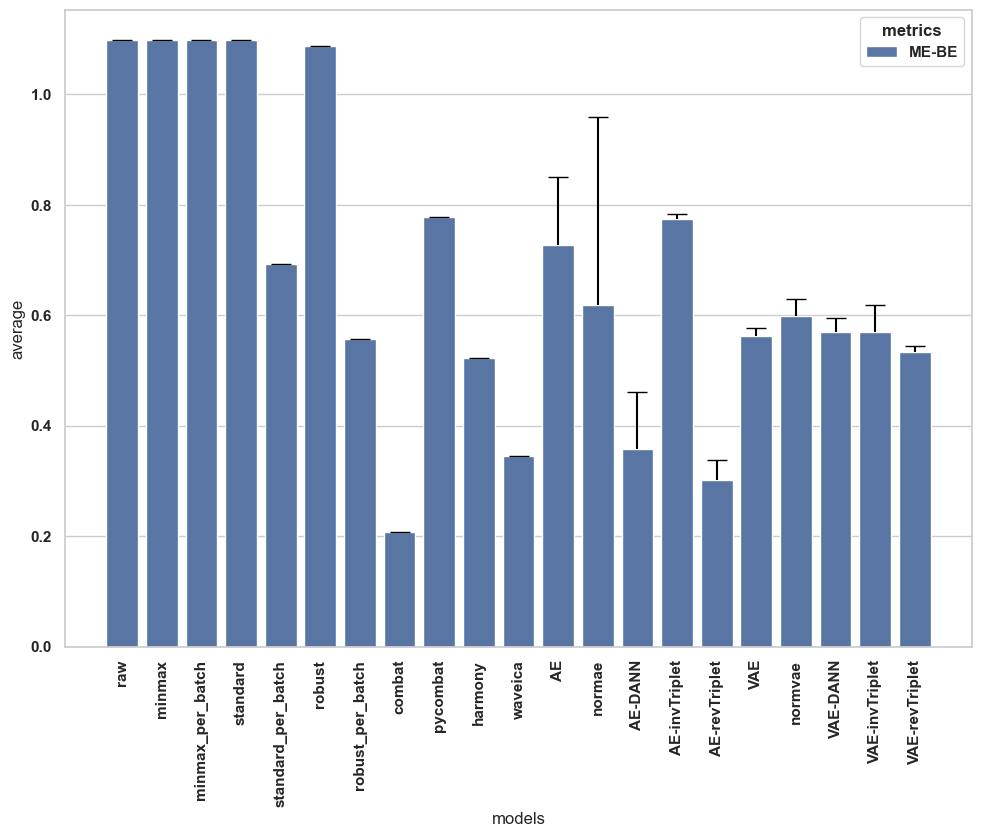

In [19]:
N = len(alz_metrics['model name'])
width = 0.36
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df_be, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])

plotline, caplines, barlinecols = g.errorbar(x = ind, y = df_be['average'], lolims=lolims,
            yerr=df_be['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(15)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
 
plt.show()

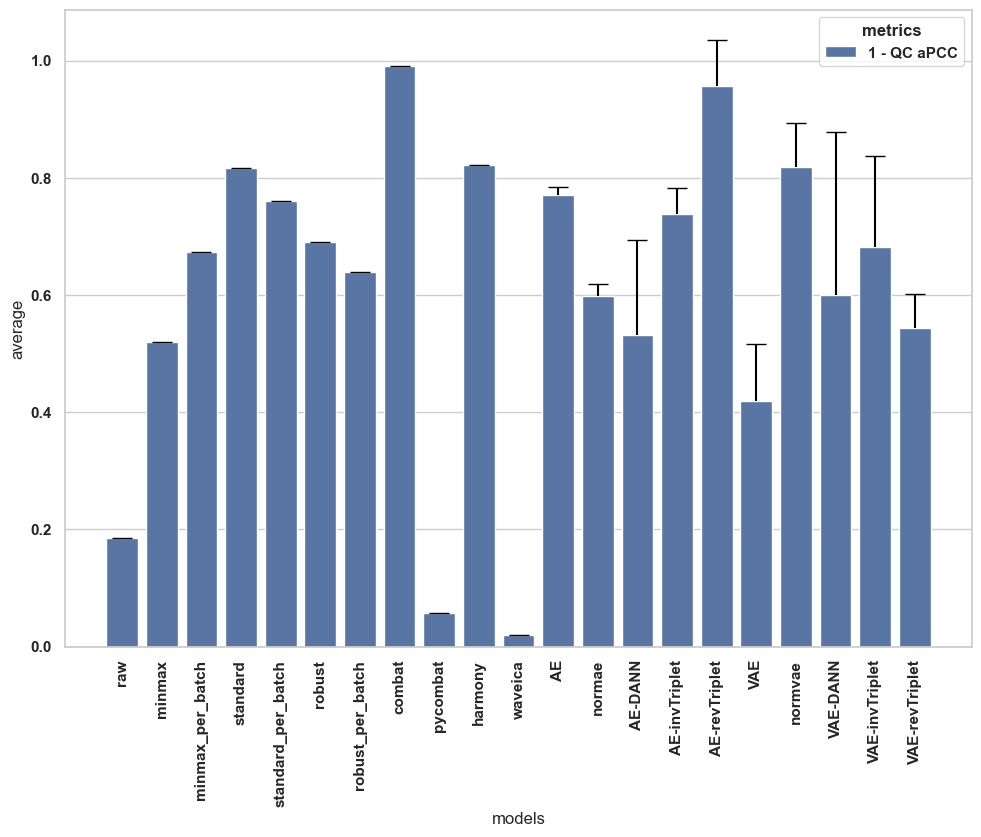

In [21]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df_qc_aPCC, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])

    
plotline, caplines, barlinecols = g.errorbar(x = ind, y = df_qc_aPCC['average'], lolims=lolims,
            yerr=df_qc_aPCC['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(15)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
 
plt.show()

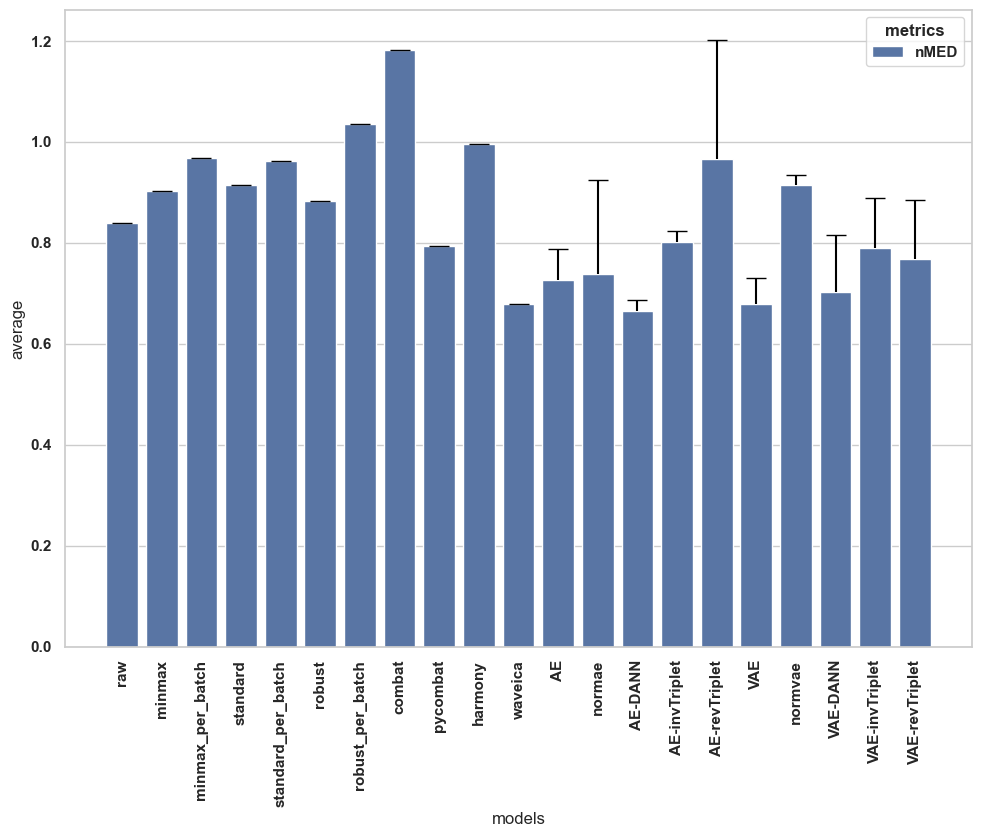

In [22]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df_dist, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])
   
plotline, caplines, barlinecols = g.errorbar(x = ind, y = df_dist['average'], lolims=lolims,
            yerr=df_dist['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(15)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
 
plt.show()

# Mice

In [23]:
alz_metrics = pd.read_excel('summary_results.xlsx', sheet_name='mice best metrics')
alz_metrics['batch_entropy mean'] = np.log(7) - alz_metrics['batch_entropy mean']


In [24]:
alz_metrics

,model name,batch_entropy mean,batch_entropy std,adjusted_rand_score mean,adjusted_rand_score std,adjusted_mutual_info_score mean,adjusted_mutual_info_score std
0,raw,1.703113,0.000000,0.783630,0.000000,0.818056,0.000000
1,minmax,1.710584,0.000000,0.809809,0.000000,0.835449,0.000000
2,minmax_per_batch,1.700969,0.000000,0.749553,0.000000,0.791972,0.000000
3,standard,1.583245,0.000000,0.735547,0.000000,0.779283,0.000000
4,standard_per_batch,0.774525,0.000000,0.014476,0.000000,0.051643,0.000000
5,robust,1.417413,0.000000,0.261142,0.000000,0.518879,0.000000
6,robust_per_batch,1.469135,0.000000,-0.004012,0.000000,0.008826,0.000000
7,combat,0.450135,0.000000,-0.002361,0.000000,-0.002861,0.000000
8,pycombat,0.675690,0.000000,-0.001333,0.000000,0.003963,0.000000
9,harmony,0.145322,0.000000,0.049053,0.000000,0.078964,0.000000


In [25]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['batch_entropy mean'], alz_metrics['adjusted_rand_score mean'], alz_metrics['adjusted_mutual_info_score mean'])),
    "sd": pd.concat((alz_metrics['batch_entropy std'], alz_metrics['adjusted_rand_score std'], alz_metrics['adjusted_mutual_info_score std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['ME-BE' for _ in range(len(alz_metrics['model name']))] + ['ARI' for _ in range(len(alz_metrics['model name']))] + ['AMI' for _ in range(len(alz_metrics['model name']))]
})
df_ami_ari = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['adjusted_rand_score mean'], alz_metrics['adjusted_mutual_info_score mean'])),
    "sd": pd.concat((alz_metrics['adjusted_rand_score std'], alz_metrics['adjusted_mutual_info_score std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['ARI' for _ in range(len(alz_metrics['model name']))] + ['AMI' for _ in range(len(alz_metrics['model name']))]
})
df_be = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['batch_entropy mean'],
    "sd" : alz_metrics['batch_entropy std'],
    "models": alz_metrics['model name'],
    "metrics": ['ME-BE' for _ in range(len(alz_metrics['model name']))]
})
df_ari = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['adjusted_rand_score mean'],
    "sd" : alz_metrics['adjusted_rand_score std'],
    "models": alz_metrics['model name'],
    "metrics": ['ARI' for _ in range(len(alz_metrics['model name']))]
})
df_ami = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['adjusted_mutual_info_score mean'],
    "sd" : alz_metrics['adjusted_mutual_info_score std'],
    "models": alz_metrics['model name'],
    "metrics": ['AMI' for _ in range(len(alz_metrics['model name']))]
})
lolims = [True for _ in range(len(df_be['metrics']))]

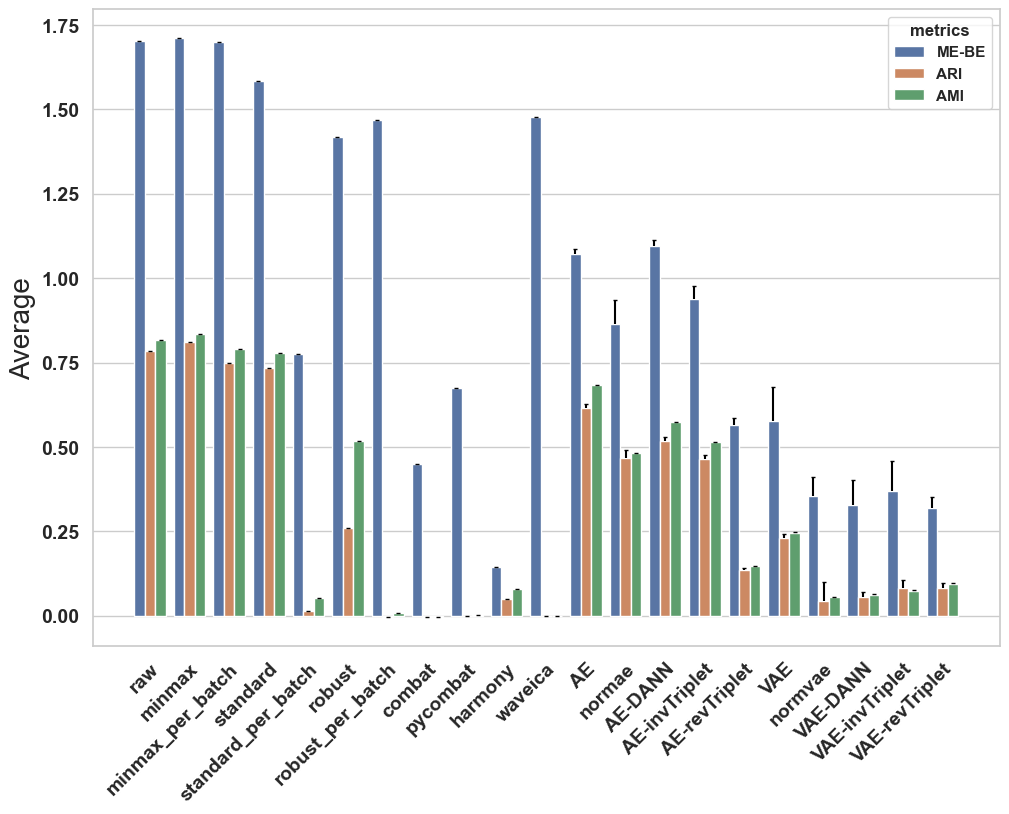

In [26]:
N = len(alz_metrics['model name'])
width = 0.27
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])

plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_be['average'], lolims=lolims,
            yerr=df_be['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(3)
    
plotline, caplines, barlinecols = g.errorbar(x = ind, y = df_ari['average'], lolims=lolims,
            yerr=df_ari['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(3)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_ami['average'], lolims=lolims,
            yerr=df_ami['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(3)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("Average",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=14)

plt.show()

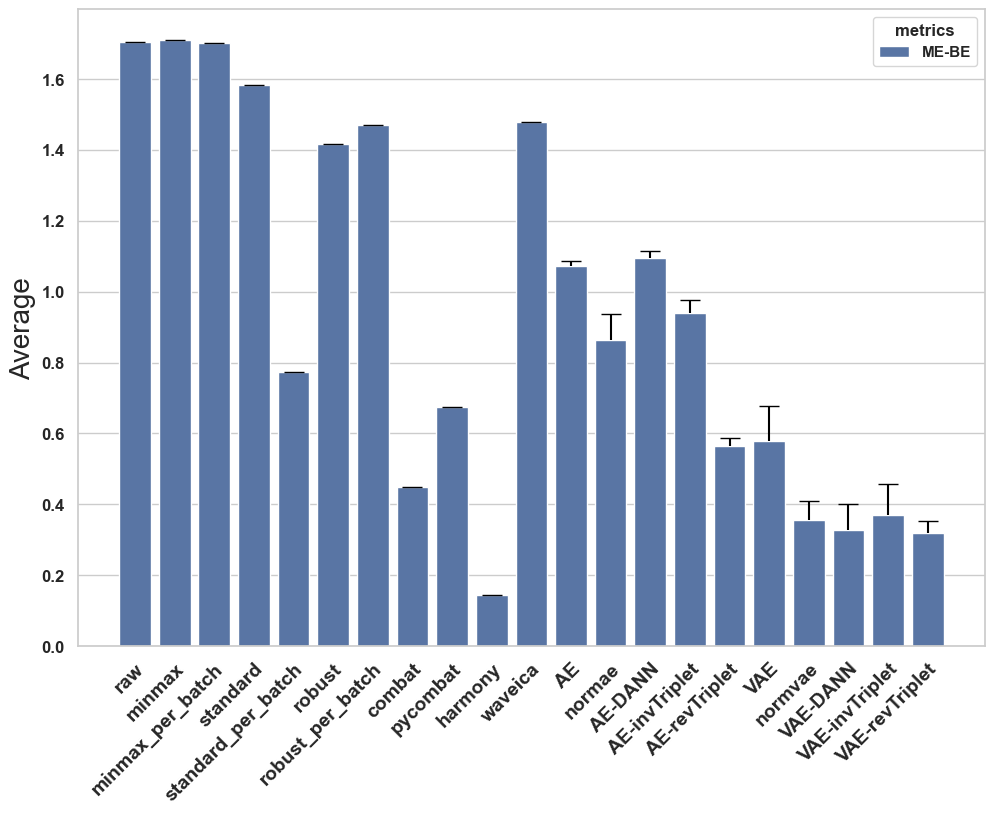

In [27]:
N = len(alz_metrics['model name'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df_be, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])

plotline, caplines, barlinecols = g.errorbar(x = ind, y = df_be['average'], lolims=lolims,
            yerr=df_be['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(15)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("Average",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=12)
g.set(ylim=(0, None))    

plt.show()

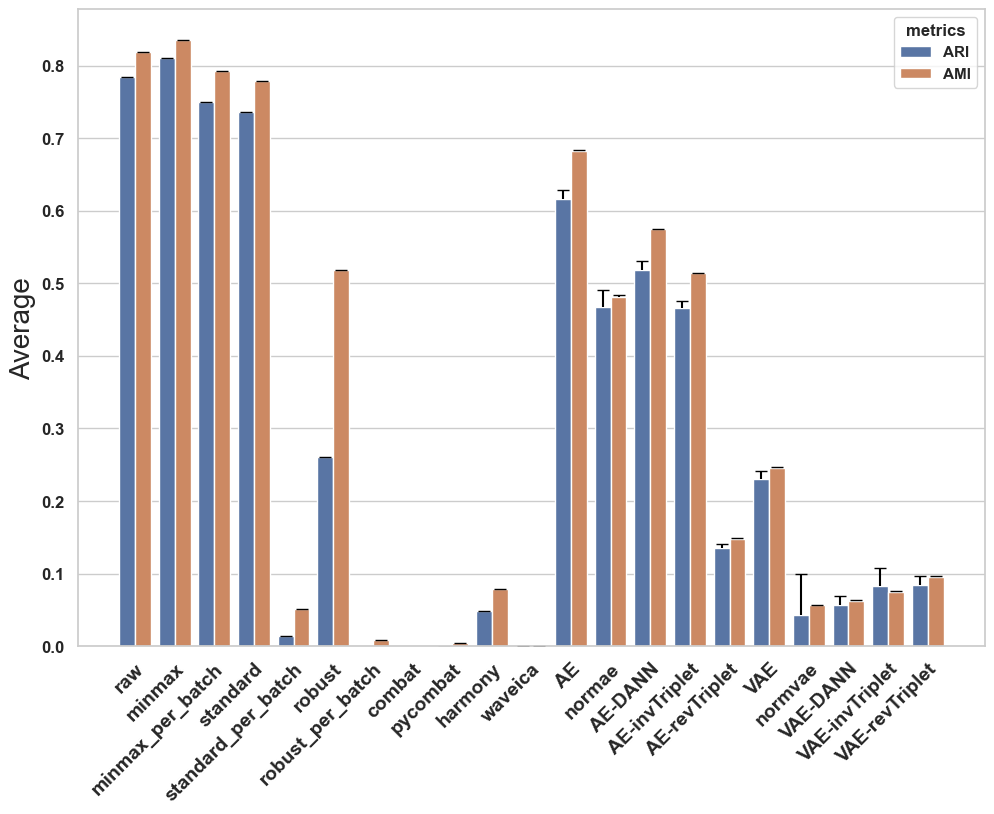

In [28]:
N = len(alz_metrics['model name'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="average", data=df_ami_ari, ci=None, hue='metrics',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=alz_metrics['model name'])

plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_ari['average'], lolims=lolims,
            yerr=df_ari['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(8)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_ami['average'], lolims=lolims,
            yerr=df_ami['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(8)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}

matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("Average",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=12)
g.set(ylim=(0, None))    

plt.show()